In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dados = pd.read_csv("vgsales.csv")

In [4]:
#remove valores NaN
dados = dados.dropna()

In [5]:
#obtendo apenas variaveis desejadas
#desjamos prever a venda de um videogame na america do norte em função da plataforma, ano, genero e autora
dataset = dados.loc[:, ["Platform", "Year", "Genre" , "Publisher", "NA_Sales"]]

In [6]:
#escolhendo consoles para comparar
consoles = dataset["Platform"].value_counts()

In [7]:
#plataformas relevantes
relevantes = (dataset["Platform"] == "PS3") | (dataset["Platform"] == "Wii") |  (dataset["Platform"] == "X360")
dataset = dataset.loc[relevantes,:]

In [8]:
#Peganado top 10 publishers
top_10 = dataset["Publisher"].value_counts().head(10)
top_10_dict = top_10.to_dict()
chav = top_10_dict.keys()


keys = []


for i in chav:
    keys.append(i)
top_10

Electronic Arts                 395
Activision                      350
Ubisoft                         285
Namco Bandai Games              214
THQ                             185
Konami Digital Entertainment    162
Take-Two Interactive            161
Sega                            148
Sony Computer Entertainment     128
Capcom                           95
Name: Publisher, dtype: int64

In [9]:
#filtrando publishers
filtro = (dataset["Publisher"] == keys[0]) | (dataset["Publisher"] == keys[1]) | \
(dataset["Publisher"] == keys[2]) | (dataset["Publisher"] == keys[3]) | (dataset["Publisher"] == keys[4])\
| (dataset["Publisher"] == keys[5]) | (dataset["Publisher"] == keys[6]) | (dataset["Publisher"] == keys[7])\
| (dataset["Publisher"] == keys[8]) | (dataset["Publisher"] == keys[9])

game = dataset.loc[filtro,:]

In [10]:
#DataSet com Dummies
gamed = pd.get_dummies(game, columns = ["Platform", "Genre", "Publisher"])
gamed

,Year,NA_Sales,Platform_PS3,Platform_Wii,Platform_X360,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Publisher_Activision,Publisher_Capcom,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Namco Bandai Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Ubisoft
16,2013.0,7.01,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23,2013.0,9.63,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29,2011.0,9.03,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31,2010.0,9.67,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
34,2012.0,4.99,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16413,2006.0,0.00,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16437,2010.0,0.01,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16482,2012.0,0.01,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
16517,2007.0,0.00,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
PS3 = gamed["Platform_PS3"] == 1
Wii = gamed["Platform_Wii"] == 1
X360 = gamed["Platform_X360"] == 1

PS3 = gamed.loc[PS3,:]
Wii = gamed.loc[Wii,:]
X360 = gamed.loc[X360,:]

In [26]:
total_sales = gamed["NA_Sales"]

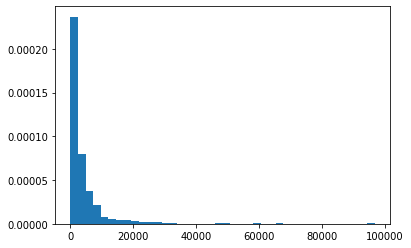

In [27]:
plt.hist(total_sales, density = True, bins = 40);

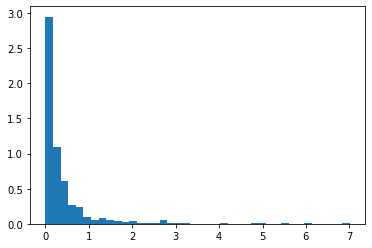

In [21]:
PS3_sales = PS3["NA_Sales"]
PS3_sales.describe()
plt.hist(PS3_sales, density = True, bins = 40);

count    701.000000
mean       0.550713
std        1.027862
min        0.000000
25%        0.110000
50%        0.240000
75%        0.570000
max        9.670000
Name: NA_Sales, dtype: float64

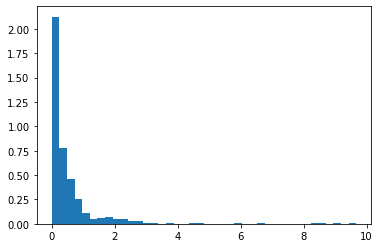

In [20]:
X360_sales = X360["NA_Sales"]
plt.hist(X360_sales, density = True, bins = 40);
X360_sales.describe()

count    596.000000
mean       0.340839
std        0.536661
min        0.000000
25%        0.100000
50%        0.190000
75%        0.410000
max        6.050000
Name: NA_Sales, dtype: float64

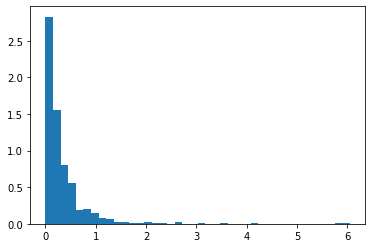

In [19]:
Wii_sales = Wii["NA_Sales"]
plt.hist(Wii_sales, density = True, bins = 40);
Wii_sales.describe()